In [1]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pandas as pd
import re
import numpy as np

file_path = "/home/jlascar/Documents/Chess/experiments/Expe3/lichess-2025-07_SF.jsonl"

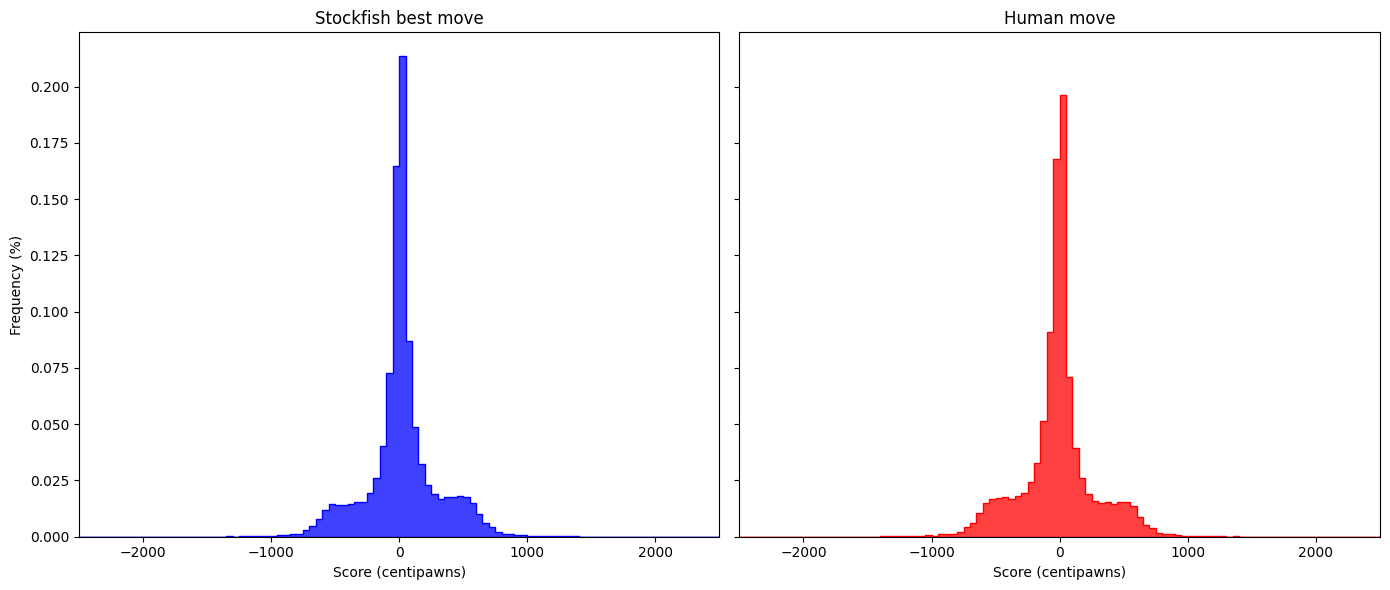

In [6]:
model_types = ["norules", "medium", "withrules"]

records = []
with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data = json.loads(line)
        sf_score = data.get("stockfish", {}).get("SF_score")
        human_score = data.get("human", {}).get("SF_score")
        olp = data.get("OLP", {})
        nb_games_keys = set(k.split("_")[0] for k in olp.keys() if any(m in k for m in model_types))
        if not isinstance(sf_score,str)  and not isinstance(human_score,str) :
            for model, values in olp.items():
                for model_type in model_types:
                    if model.endswith(model_type):
                        model_score = values.get("SF_score")
                        if not isinstance(model_score, str):
                            continue


        
            records.append({"sf_score": sf_score, "human_score": human_score})

df = pd.DataFrame(records)

bins = np.arange(-2500, 2501, 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Stockfish
sns.histplot(df["sf_score"], bins=bins, color="blue", element="step", stat="probability", ax=axes[0])
axes[0].set_title("Stockfish best move")
axes[0].set_xlabel("Score (centipawns)")
axes[0].set_ylabel("Frequency (%)")
axes[0].set_xlim(-2500, 2500)

# Human
sns.histplot(df["human_score"], bins=bins, color="red", element="step", stat="probability", ax=axes[1])
axes[1].set_title("Human move")
axes[1].set_xlabel("Score (centipawns)")
axes[1].set_xlim(-2500, 2500)

plt.tight_layout()
plt.show()

In [4]:
df['sf_score'].describe(), df['human_score'].describe()

(count    70194.000000
 mean        22.032026
 std        423.302773
 min      -9605.000000
 25%        -68.000000
 50%          6.000000
 75%        105.000000
 max       4812.000000
 Name: sf_score, dtype: float64,
 count    70194.000000
 mean       -15.859703
 std        433.052989
 min      -9605.000000
 25%       -110.000000
 50%         -5.000000
 75%         71.000000
 max       9605.000000
 Name: human_score, dtype: float64)

In [7]:
df

,sf_score,human_score
0,33,33
1,-33,-33
2,41,41
3,-35,-57
4,40,40
...,...,...
70189,447,-441
70190,328,-586
70191,602,602
70192,-582,-582


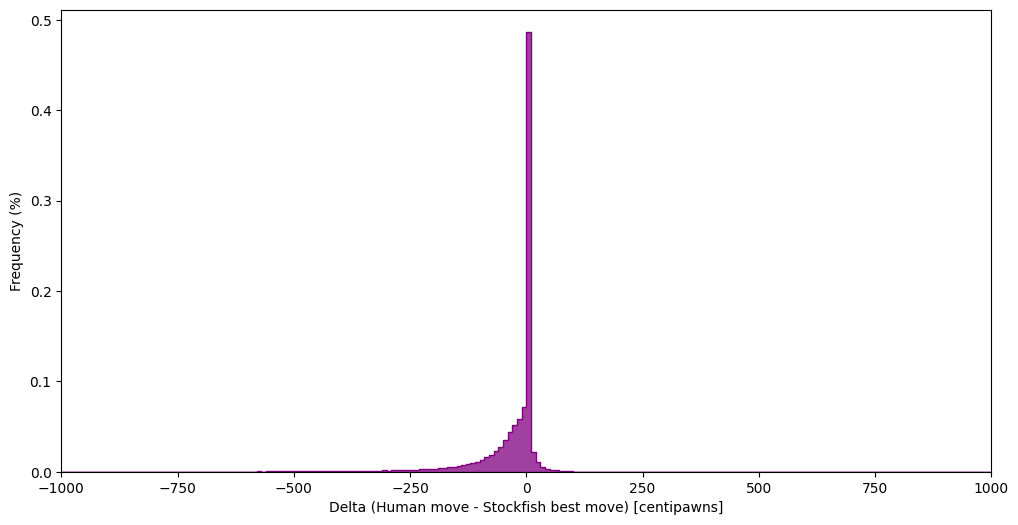

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df["delta"] = df["human_score"] - df["sf_score"]

bins = np.arange(-1000, 1001, 10)

plt.figure(figsize=(12, 6))
sns.histplot(df["delta"], bins=bins, color="purple", element="step", stat="probability")

plt.xlabel("Delta (Human move - Stockfish best move) [centipawns]")
plt.ylabel("Frequency (%)")
plt.xlim(-1000, 1000)
plt.show()

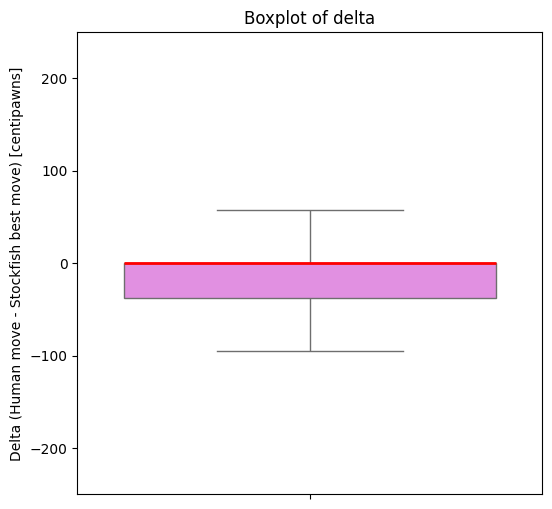

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.boxplot(y=df["delta"], color="violet", showfliers=False, medianprops={"color": "red", "linewidth": 2})

plt.ylabel("Delta (Human move - Stockfish best move) [centipawns]")
plt.title("Boxplot of delta")
plt.ylim(-250, 250)
plt.show()